In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
dataset = pd.read_csv('dataset/auto-mpg.csv')
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
data = dataset.iloc[:, :7]
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70


In [4]:
data.shape

(398, 7)

In [5]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
dtype: object

In [6]:
horsepower_nulls = np.nonzero(~data.horsepower.str.isdigit())[0]
horsepower_nulls

array([ 32, 126, 330, 336, 354, 374], dtype=int64)

In [7]:
data.iloc[horsepower_nulls]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,?,2046,19.0,71
126,21.0,6,200.0,?,2875,17.0,74
330,40.9,4,85.0,?,1835,17.3,80
336,23.6,4,140.0,?,2905,14.3,80
354,34.5,4,100.0,?,2320,15.8,81
374,23.0,4,151.0,?,3035,20.5,82


In [8]:
data = data.replace('?', np.nan) # Replace '?' with NaN

In [9]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
dtype: int64

In [10]:
data['horsepower'] = data['horsepower'].fillna(data['horsepower'].astype('float64').median())

In [11]:
data.iloc[horsepower_nulls]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,93.5,2046,19.0,71
126,21.0,6,200.0,93.5,2875,17.0,74
330,40.9,4,85.0,93.5,1835,17.3,80
336,23.6,4,140.0,93.5,2905,14.3,80
354,34.5,4,100.0,93.5,2320,15.8,81
374,23.0,4,151.0,93.5,3035,20.5,82


In [12]:
data.skew()

mpg             0.457066
cylinders       0.526922
displacement    0.719645
horsepower      1.106224
weight          0.531063
acceleration    0.278777
model year      0.011535
dtype: object

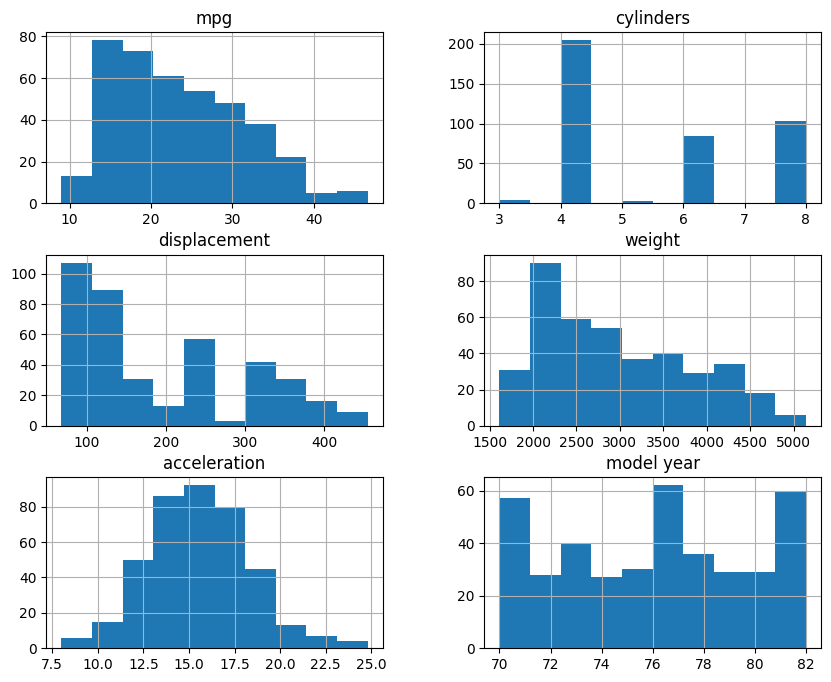

In [13]:
data.hist(figsize=(10, 8))
plt.show()

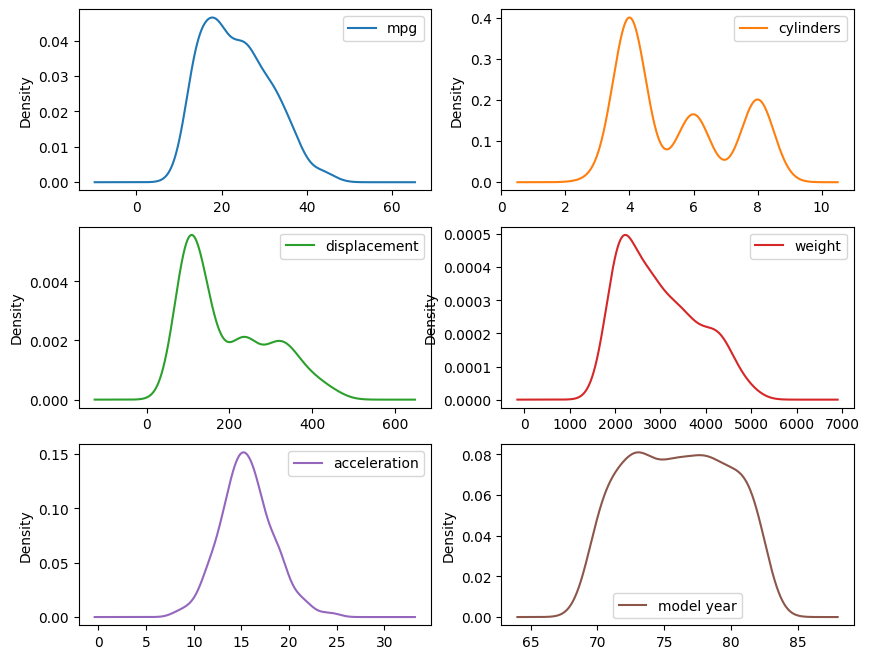

In [14]:
data.plot(kind='density', sharex=False, subplots=True,
         figsize=(10, 8), layout=(3, 2))
plt.show()

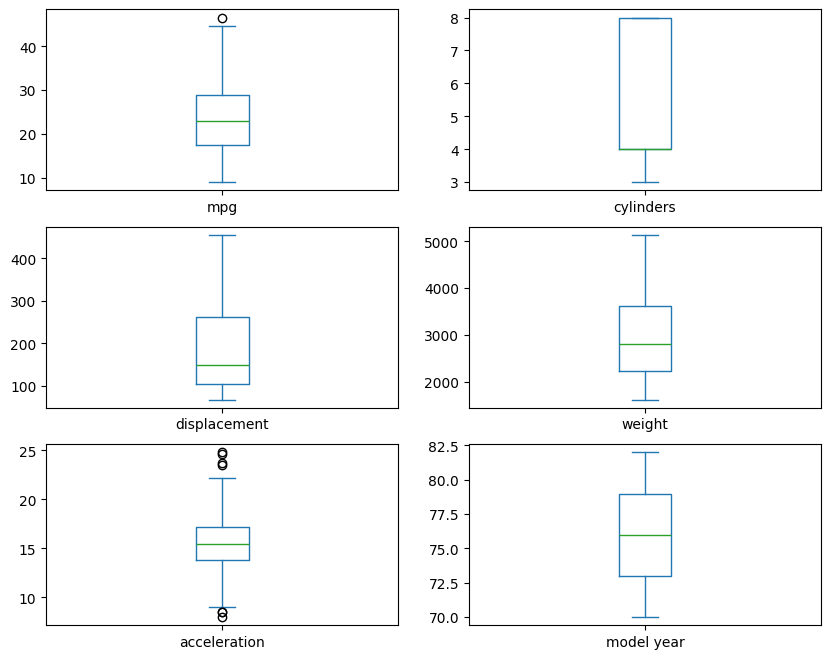

In [15]:
data.plot(kind='box', sharex=False, subplots=True,
         figsize=(10, 8), layout=(3, 2))
plt.show()

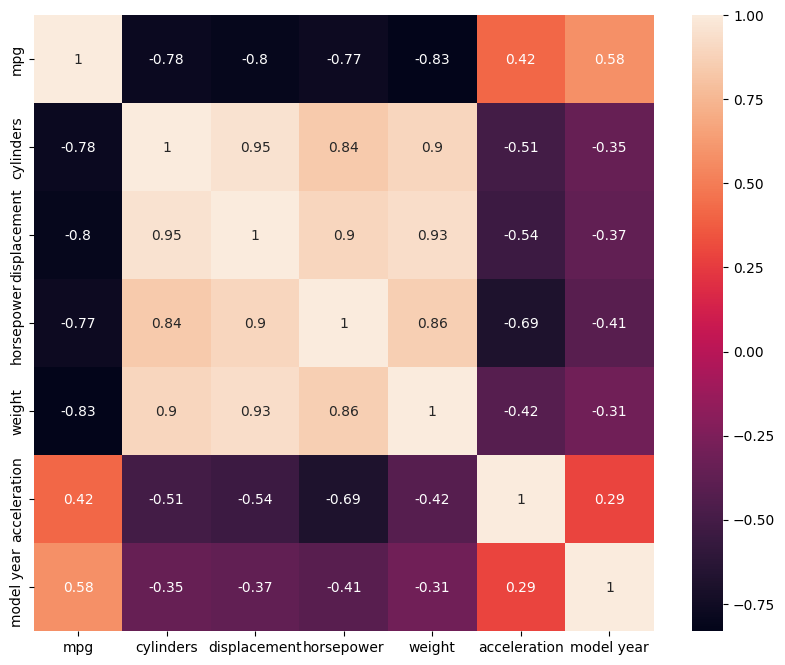

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True)
plt.show()

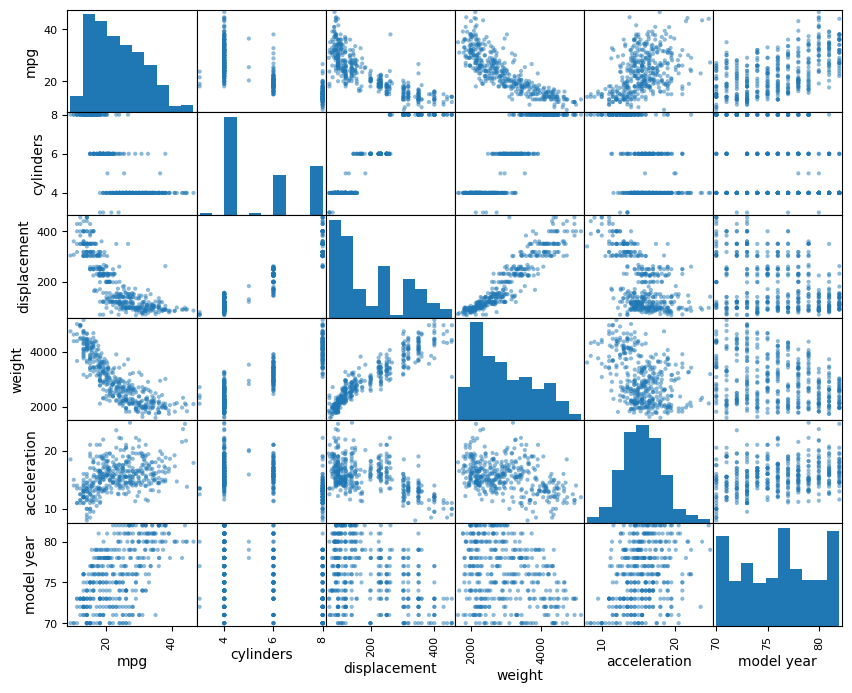

In [17]:
pd.plotting.scatter_matrix(data, figsize=(10, 8))
plt.show()

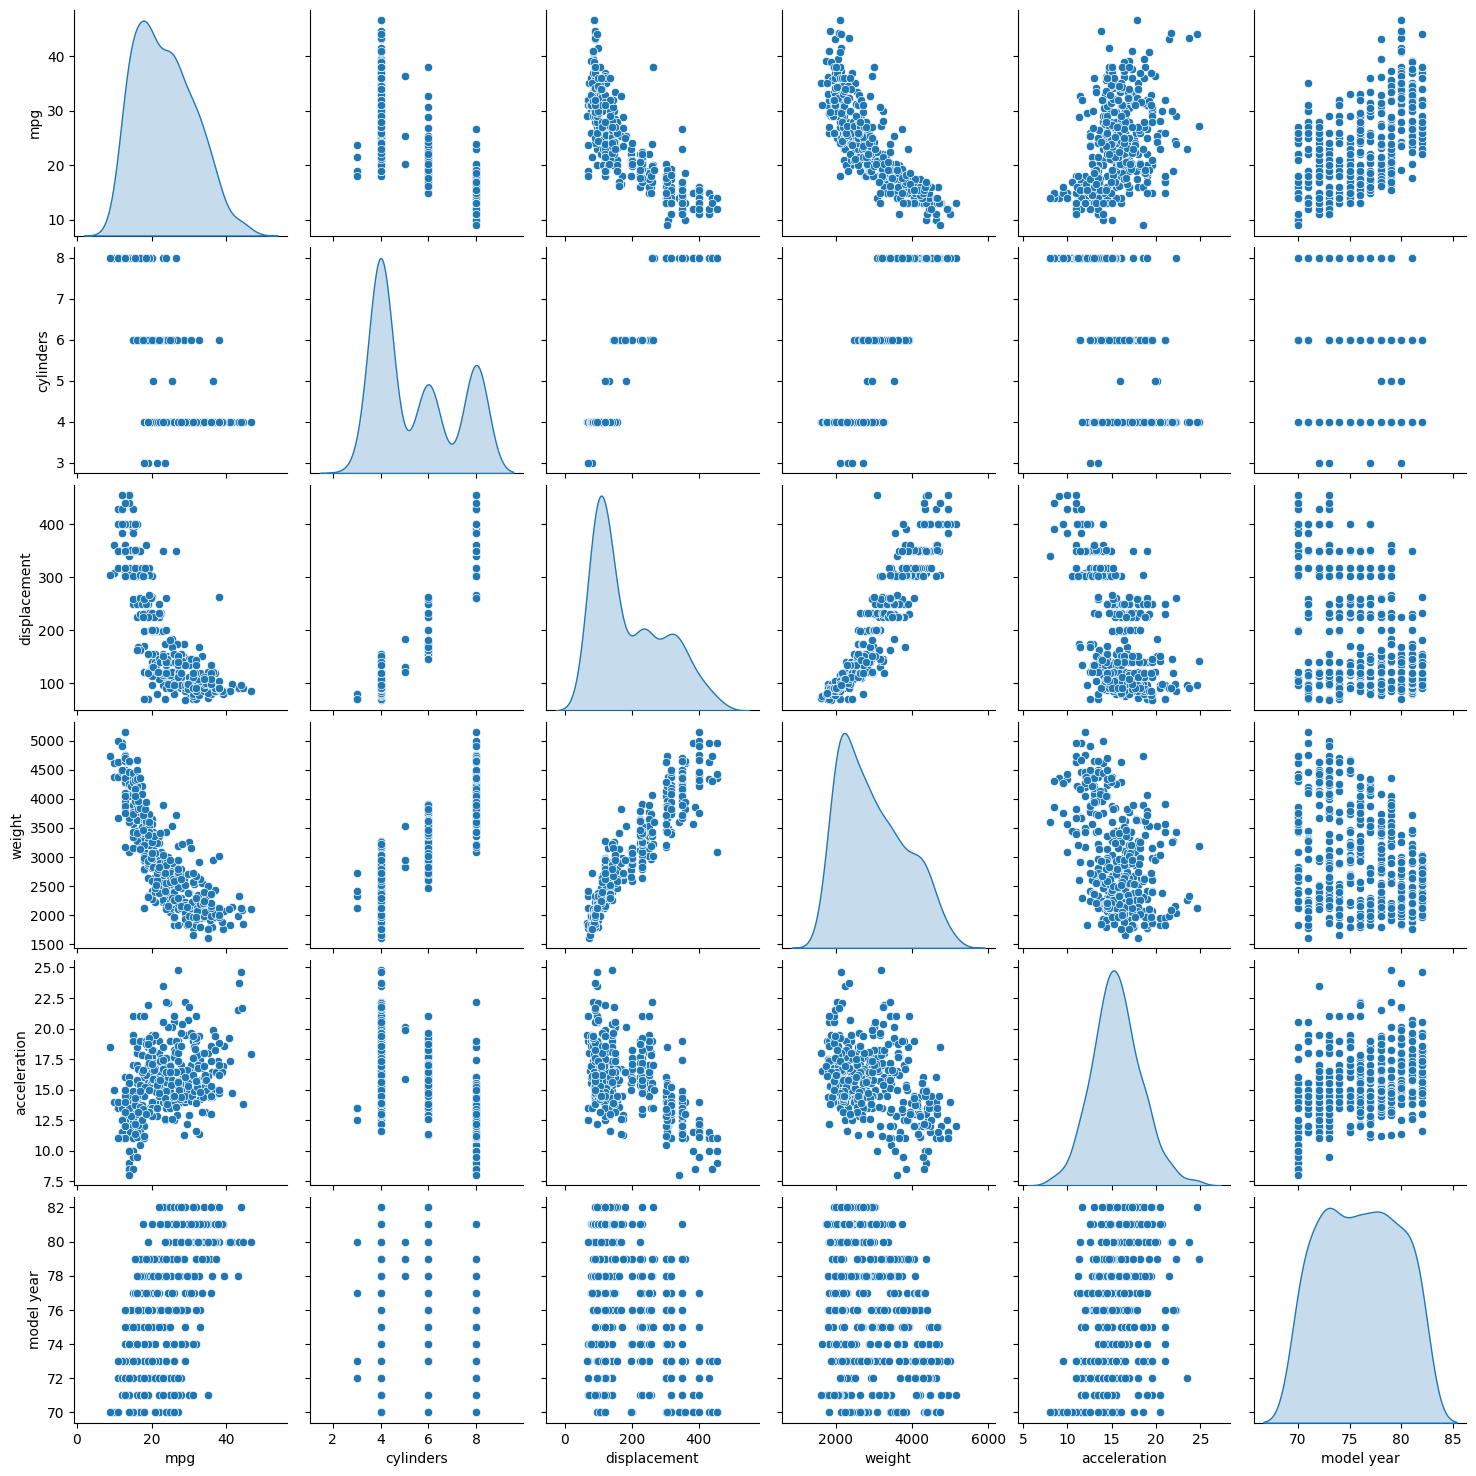

In [18]:
sns.pairplot(data, diag_kind='kde')
plt.show()

In [19]:
y = np.asanyarray(data['mpg'])
x1 = np.asanyarray(data['cylinders']).reshape(-1, 1)
x2 = np.asanyarray(data['displacement']).reshape(-1, 1)
x3 = np.asanyarray(data['horsepower']).reshape(-1, 1)
x4 = np.asanyarray(data['weight']).reshape(-1, 1)
x5 = np.asanyarray(data['acceleration']).reshape(-1, 1)
x6 = np.asanyarray(data['model year']).reshape(-1, 1)

In [20]:
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size=.2, random_state=6)
x2_train, x2_test, y_train, y_test = train_test_split(x2, y, test_size=.2, random_state=6)
x3_train, x3_test, y_train, y_test = train_test_split(x3, y, test_size=.2, random_state=6)
x4_train, x4_test, y_train, y_test = train_test_split(x4, y, test_size=.2, random_state=6)
x5_train, x5_test, y_train, y_test = train_test_split(x5, y, test_size=.2, random_state=6)
x6_train, x6_test, y_train, y_test = train_test_split(x6, y, test_size=.2, random_state=6)

In [21]:
model = LinearRegression()

In [22]:
model.fit(x1_train, y_train)
model.fit(x2_train, y_train)
model.fit(x3_train, y_train)
model.fit(x4_train, y_train)
model.fit(x5_train, y_train)
model.fit(x6_train, y_train)

LinearRegression()

In [23]:
model.coef_ 

array([1.16867933])

In [24]:
model.intercept_

-65.24950334092827

In [25]:
y_pred = model.predict(x1_test)
y_pred

array([-58.23742736, -55.9000687 , -55.9000687 , -55.9000687 ,
       -58.23742736, -58.23742736, -60.57478602, -60.57478602,
       -60.57478602, -60.57478602, -60.57478602, -60.57478602,
       -60.57478602, -55.9000687 , -55.9000687 , -60.57478602,
       -60.57478602, -60.57478602, -60.57478602, -58.23742736,
       -60.57478602, -60.57478602, -58.23742736, -60.57478602,
       -55.9000687 , -60.57478602, -55.9000687 , -60.57478602,
       -58.23742736, -55.9000687 , -60.57478602, -55.9000687 ,
       -55.9000687 , -60.57478602, -58.23742736, -60.57478602,
       -58.23742736, -59.40610669, -58.23742736, -55.9000687 ,
       -60.57478602, -58.23742736, -55.9000687 , -55.9000687 ,
       -60.57478602, -58.23742736, -58.23742736, -60.57478602,
       -60.57478602, -55.9000687 , -60.57478602, -60.57478602,
       -58.23742736, -60.57478602, -55.9000687 , -58.23742736,
       -60.57478602, -60.57478602, -58.23742736, -60.57478602,
       -60.57478602, -60.57478602, -60.57478602, -55.90

In [26]:
y_pred = model.predict(x2_test)
y_pred

array([236.26976396, 343.78826238, 466.49959209, 466.49959209,
       204.71542203, 205.88410136,  41.10031575,  91.35352696,
        39.93163641,  34.08823976,  14.22069114,  70.31729901,
        41.10031575, 287.69165451, 382.35468029,  76.16069566,
        48.11239173,  48.11239173, 111.22107558, 197.70334605,
       111.22107558,  98.36560295, 197.70334605,  77.32937499,
       402.22222891,  98.36560295, 306.3905238 ,  34.08823976,
       226.92032931, 290.02901317,  69.14861968, 306.3905238 ,
       343.78826238,  49.28107106, 117.06447224,  65.64258169,
       204.71542203, 148.61881416, 204.71542203, 402.22222891,
        39.93163641, 134.5946622 , 287.69165451, 290.02901317,
        76.16069566, 205.88410136, 105.37767893,  57.46182637,
        73.823337  , 306.3905238 ,  41.10031575,  57.46182637,
       226.92032931,  38.76295708, 290.02901317, 226.92032931,
        59.79918504,  48.11239173, 168.48636278,  76.16069566,
        35.25691909,  17.72672913, 111.22107558, 343.78

In [27]:
y_pred = model.predict(x3_test)
y_pred

array([ 63.30522303, 110.05239625, 197.70334605, 197.70334605,
       127.58258621,  39.93163641,  16.5580498 ,  45.77503307,
        -9.15289547,  44.02201407,  -7.98421614,  22.40144646,
        14.22069114,  85.51013031, 133.42598286,  63.30522303,
        13.05201181,  -2.14081949,  39.93163641,  45.77503307,
        34.08823976,  39.93163641,  51.61842972,  35.25691909,
       110.05239625,  18.89540846, 110.05239625,  10.71465315,
        18.89540846, 160.30560747,  45.77503307, 110.05239625,
       115.89579291,  44.02201407,  60.96786437,  37.59427775,
        69.14861968,  24.73880512,  63.30522303, 203.5467427 ,
        -9.15289547,  48.11239173,  98.36560295,  74.99201633,
        49.28107106,  65.64258169,  48.11239173,  21.23276712,
        48.11239173, 110.05239625,  13.05201181,  21.23276712,
        51.61842972,   7.20861516, 110.05239625,  51.61842972,
        18.89540846,  25.90748445,  34.08823976,  69.14861968,
        10.71465315,  10.71465315,  39.93163641, 104.20

In [28]:
y_pred = model.predict(x4_test)
y_pred

array([4179.39382547, 5426.37467124, 3541.29491095, 5720.88186256,
       3960.85079064, 3750.48851113, 2219.51858802, 2926.56958305,
       2371.446901  , 2079.27706835, 2116.67480693, 2559.60427323,
       2254.57896794, 3638.29529539, 4098.75495166, 3043.43751611,
       2348.07331439, 2568.95370788, 2921.89486572, 4358.20176305,
       3271.32998558, 2580.64050118, 3943.32060068, 2536.23068662,
       5774.64111177, 2740.74956948, 4831.51689196, 2242.89217463,
       3625.43982276, 5464.94108915, 3083.17261335, 4886.44482049,
       5030.19237816, 2325.86840711, 3358.98093537, 2979.16015292,
       3727.11492452, 4060.18853375, 3486.36698241, 4934.36067305,
       2254.57896794, 3422.08961923, 3965.52550797, 4565.05800457,
       3376.51112533, 3247.95639897, 3224.58281235, 2248.73557129,
       2622.71295708, 5143.55427323, 2096.80725831, 2494.15823072,
       3765.68134243, 2090.96386165, 4226.14099869, 3833.46474361,
       2611.02616378, 2622.71295708, 2958.12392497, 3056.29298

In [29]:
y_pred = model.predict(x5_test)
y_pred

array([-44.21327539, -48.30365305, -53.56271003, -52.3940307 ,
       -49.58920031, -43.97953952, -41.29157706, -48.65425685,
       -39.88916187, -45.03135092, -42.46025639, -48.88799271,
       -46.55063405, -51.22535137, -53.56271003, -48.88799271,
       -44.44701126, -37.78553907, -49.82293618, -43.04459606,
       -44.68074712, -47.13497372, -45.14821885, -45.96629439,
       -48.88799271, -42.46025639, -50.05667204, -42.57712433,
       -42.46025639, -43.62893572, -47.71931338, -48.30365305,
       -47.83618131, -43.04459606, -47.13497372, -42.34338846,
       -47.25184165, -41.7590488 , -47.71931338, -54.1470497 ,
       -40.12289773, -48.30365305, -52.97837037, -49.00486065,
       -48.30365305, -48.06991718, -48.30365305, -47.36870958,
       -48.06991718, -49.47233238, -49.12172858, -48.65425685,
       -44.21327539, -47.36870958, -51.80969104, -45.38195472,
       -45.38195472, -48.30365305, -46.55063405, -49.47233238,
       -46.08316232, -43.04459606, -46.55063405, -50.05

In [30]:
y_pred = model.predict(x6_test)
y_pred

array([21.23276712, 21.23276712, 16.5580498 , 20.06408779, 25.90748445,
       27.07616378, 17.72672913, 25.90748445, 28.24484311, 28.24484311,
       20.06408779, 21.23276712, 29.41352244, 22.40144646, 16.5580498 ,
       20.06408779, 29.41352244, 18.89540846, 27.07616378, 22.40144646,
       25.90748445, 17.72672913, 25.90748445, 18.89540846, 20.06408779,
       20.06408779, 23.57012579, 29.41352244, 22.40144646, 16.5580498 ,
       22.40144646, 20.06408779, 27.07616378, 17.72672913, 23.57012579,
       30.58220177, 27.07616378, 27.07616378, 22.40144646, 20.06408779,
       25.90748445, 22.40144646, 16.5580498 , 23.57012579, 22.40144646,
       30.58220177, 24.73880512, 30.58220177, 25.90748445, 21.23276712,
       28.24484311, 29.41352244, 20.06408779, 28.24484311, 18.89540846,
       21.23276712, 28.24484311, 21.23276712, 16.5580498 , 22.40144646,
       28.24484311, 17.72672913, 27.07616378, 20.06408779, 23.57012579,
       28.24484311, 24.73880512, 22.40144646, 24.73880512, 30.58

In [31]:
frame = pd.DataFrame({'cylinders': np.squeeze(x1_test), 'displacement': np.squeeze(x2_test), 'horsepower': np.squeeze(x3_test), 'Weight': np.squeeze(x4_test), 'acceleration': np.squeeze(x5_test), 'model year': np.squeeze(x6_test), 'Real MPG': y_test, 'Predicted MPG': y_pred})
frame

,cylinders,displacement,horsepower,Weight,acceleration,model year,Real MPG,Predicted MPG
0,6,258.0,110,3632,18.0,74,16.0,21.232767
1,8,350.0,150,4699,14.5,74,13.0,21.232767
2,8,455.0,225,3086,10.0,70,14.0,16.558050
3,8,455.0,225,4951,11.0,73,12.0,20.064088
4,6,231.0,165,3445,13.4,78,17.7,25.907484
...,...,...,...,...,...,...,...,...
75,4,130.0,102,3150,15.7,76,20.0,23.570126
76,8,305.0,145,3880,12.5,77,17.5,24.738805
77,8,429.0,198,4952,11.5,73,12.0,20.064088
78,8,351.0,149,4335,14.5,77,16.0,24.738805


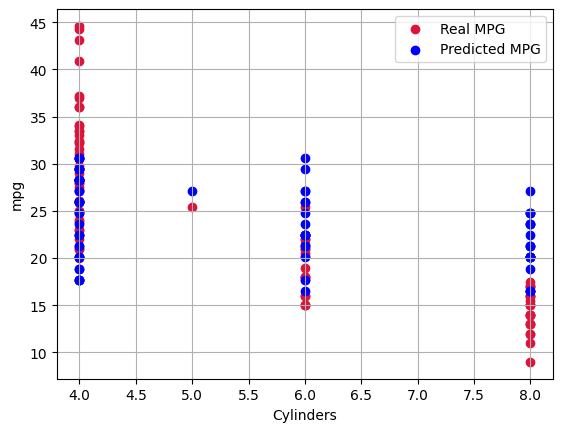

In [32]:
plt.scatter(x1_test, y_test, color='crimson', label='Real MPG')
plt.scatter(x1_test, y_pred, color='blue', label='Predicted MPG')
plt.xlabel('Cylinders')
plt.ylabel('mpg')
plt.legend(loc='upper right')
plt.grid()
plt.show()

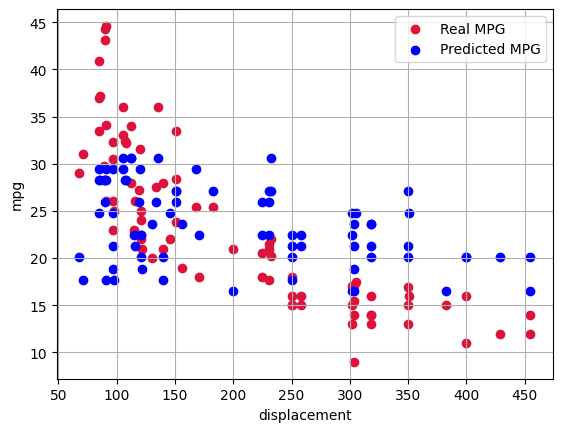

In [33]:
plt.scatter(x2_test, y_test, color='crimson', label='Real MPG')
plt.scatter(x2_test, y_pred, color='blue', label='Predicted MPG')
plt.xlabel('displacement')
plt.ylabel('mpg')
plt.legend(loc='upper right')
plt.grid()
plt.show()

TypeError: unhashable type: 'numpy.ndarray'

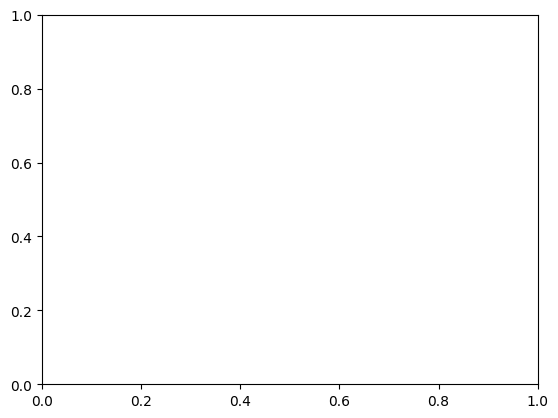

In [34]:
plt.scatter(x3_test, y_test, color='crimson', label='Real MPG')
plt.scatter(x3_test, y_pred, color='blue', label='Predicted MPG')
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.legend(loc='upper right')
plt.grid()
plt.show()

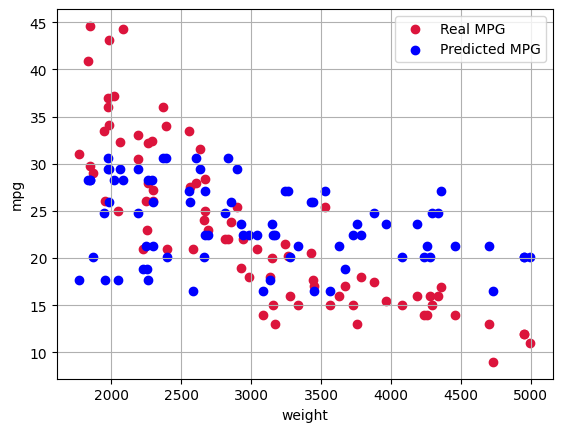

In [35]:
plt.scatter(x4_test, y_test, color='crimson', label='Real MPG')
plt.scatter(x4_test, y_pred, color='blue', label='Predicted MPG')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.legend(loc='upper right')
plt.grid()
plt.show()

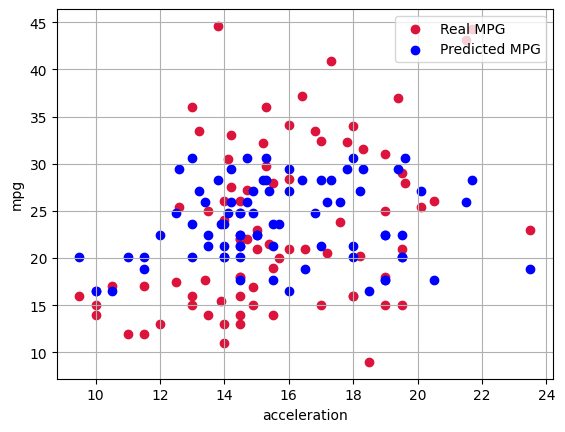

In [36]:
plt.scatter(x5_test, y_test, color='crimson', label='Real MPG')
plt.scatter(x5_test, y_pred, color='blue', label='Predicted MPG')
plt.xlabel('acceleration')
plt.ylabel('mpg')
plt.legend(loc='upper right')
plt.grid()
plt.show()

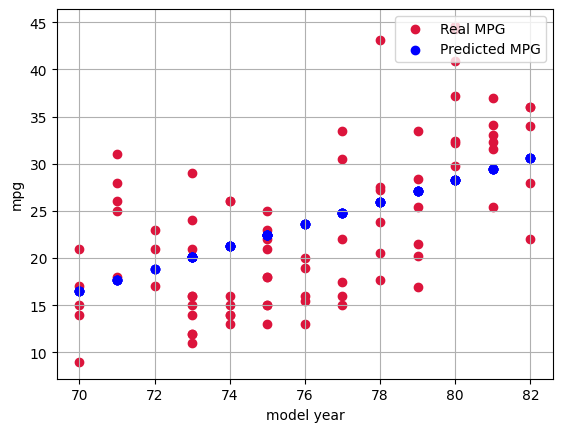

In [37]:
plt.scatter(x6_test, y_test, color='crimson', label='Real MPG')
plt.scatter(x6_test, y_pred, color='blue', label='Predicted MPG')
plt.xlabel('model year')
plt.ylabel('mpg')
plt.legend(loc='upper right')
plt.grid()
plt.show()

In [38]:
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print('Mean Squared Error (MSE):', mse)
print('R-Squared (R2):', r2)

Mean Squared Error (MSE): 46.98285498471493
R-Squared (R2): 0.35567182620410054


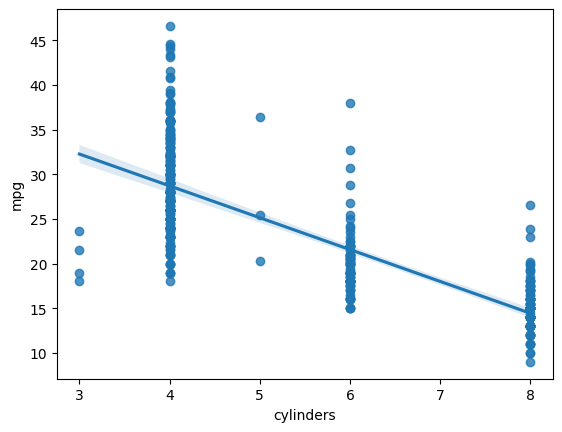

In [42]:
sns.regplot(x='cylinders', y='mpg', data=data)
plt.show()

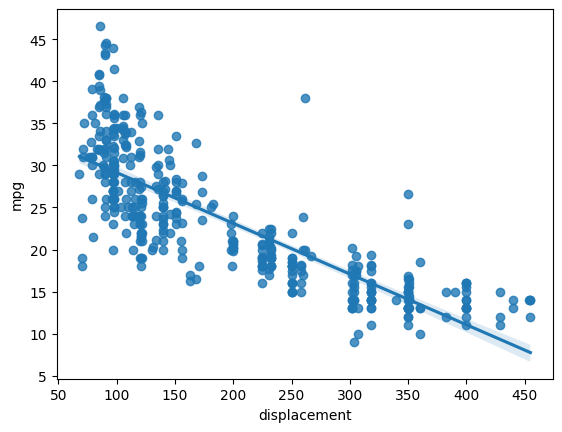

In [43]:
sns.regplot(x='displacement', y='mpg', data=data)
plt.show()

In [44]:
sns.regplot(x='horsepower', y='mpg', data=data)
plt.show()

TypeError: '<=' not supported between instances of 'str' and 'float'

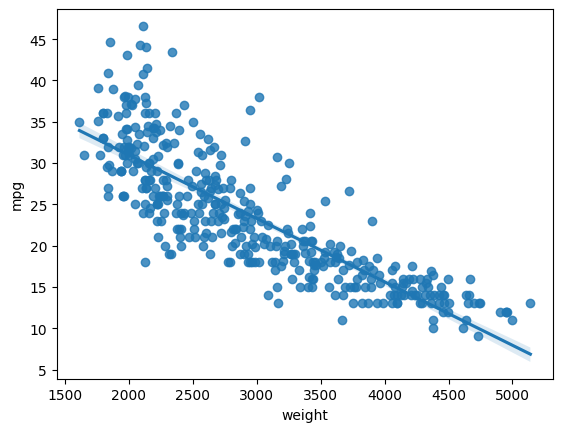

In [45]:
sns.regplot(x='weight', y='mpg', data=data)
plt.show()

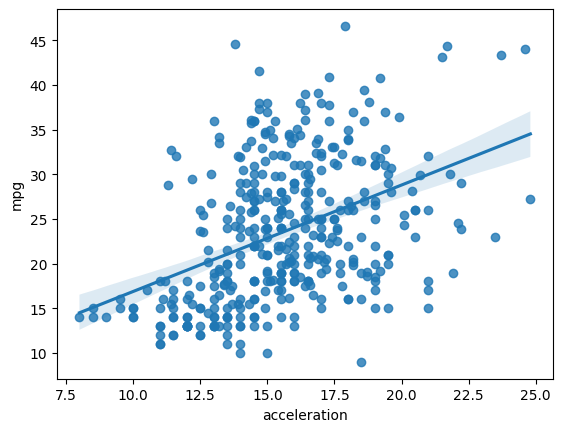

In [46]:
sns.regplot(x='acceleration', y='mpg', data=data)
plt.show()

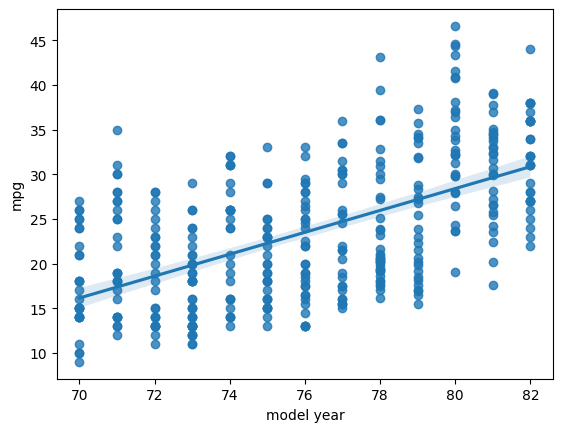

In [47]:
sns.regplot(x='model year', y='mpg', data=data)
plt.show()

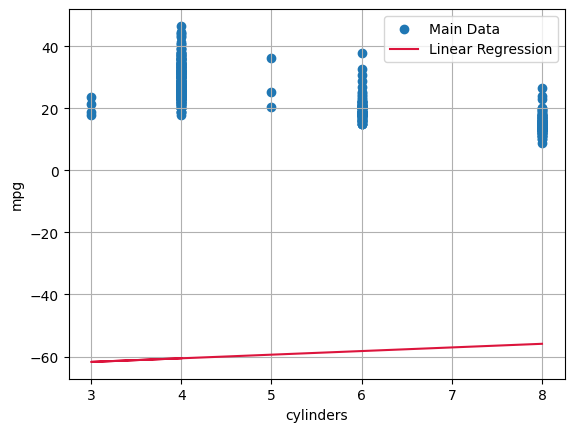

In [48]:
plt.scatter(data['cylinders'], data['mpg'], label='Main Data')
plt.plot(data['cylinders'], model.coef_[0] * data['cylinders'] + model.intercept_, color='crimson',
         label='Linear Regression')
plt.xlabel('cylinders')
plt.ylabel('mpg')
plt.legend(loc='upper right')
plt.grid()
plt.show()

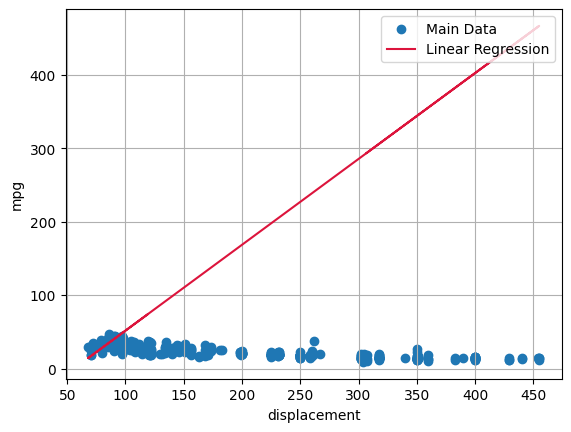

In [49]:
plt.scatter(data['displacement'], data['mpg'], label='Main Data')
plt.plot(data['displacement'], model.coef_[0] * data['displacement'] + model.intercept_, color='crimson',
         label='Linear Regression')
plt.xlabel('displacement')
plt.ylabel('mpg')
plt.legend(loc='upper right')
plt.grid()
plt.show()

TypeError: 'value' must be an instance of str or bytes, not a float

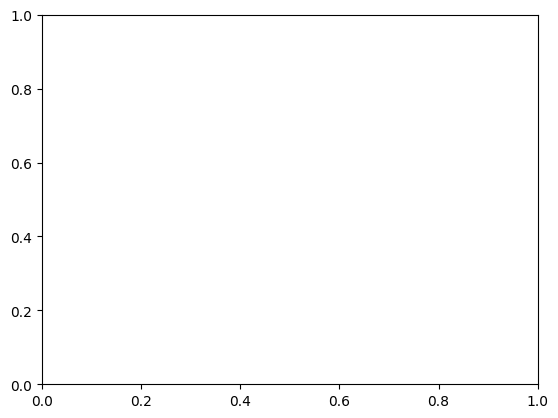

In [50]:
plt.scatter(data['horsepower'], data['mpg'], label='Main Data')
plt.plot(data['horsepower'], model.coef_[0] * data['horsepower'] + model.intercept_, color='crimson',
         label='Linear Regression')
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.legend(loc='upper right')
plt.grid()
plt.show()

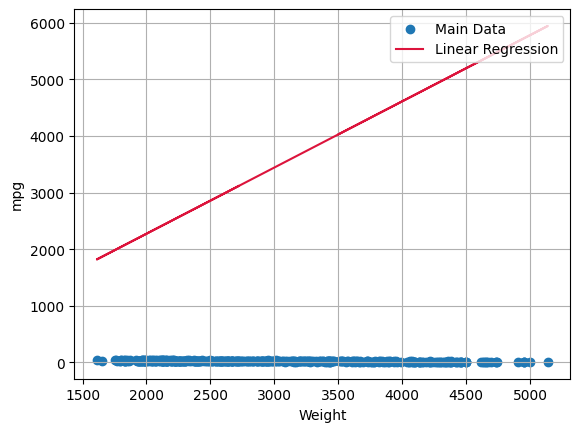

In [53]:
plt.scatter(data['weight'], data['mpg'], label='Main Data')
plt.plot(data['weight'], model.coef_[0] * data['weight'] + model.intercept_, color='crimson',
         label='Linear Regression')
plt.xlabel('Weight')
plt.ylabel('mpg')
plt.legend(loc='upper right')
plt.grid()
plt.show()

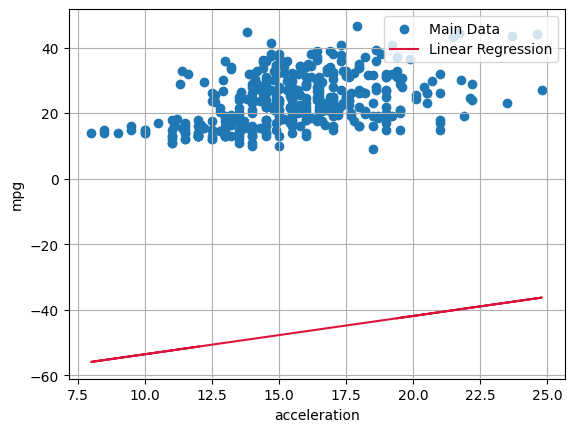

In [54]:
plt.scatter(data['acceleration'], data['mpg'], label='Main Data')
plt.plot(data['acceleration'], model.coef_[0] * data['acceleration'] + model.intercept_, color='crimson',
         label='Linear Regression')
plt.xlabel('acceleration')
plt.ylabel('mpg')
plt.legend(loc='upper right')
plt.grid()
plt.show()

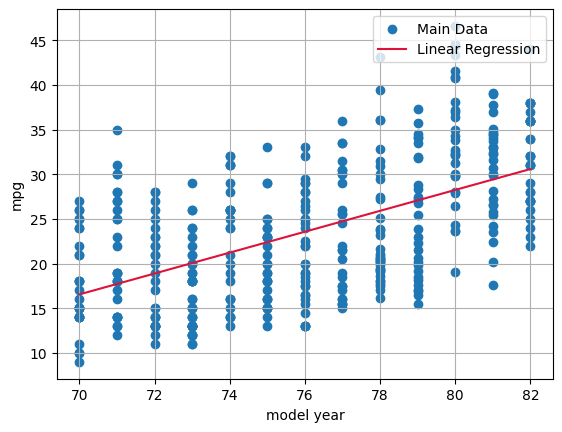

In [55]:
plt.scatter(data['model year'], data['mpg'], label='Main Data')
plt.plot(data['model year'], model.coef_[0] * data['model year'] + model.intercept_, color='crimson',
         label='Linear Regression')
plt.xlabel('model year')
plt.ylabel('mpg')
plt.legend(loc='upper right')
plt.grid()
plt.show()